Name:Shreeya Bogati

Student ID: 2417478

# **1. Regression**

1. Exploratory Data Analysis and Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Adding the csv files

data_location ="/content/drive/MyDrive/week2/apple_quality.csv"

# **Source of Data**
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics like fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality which I got via Kaggle.


This dataset was created a year back by Nidula Elgiriyewithana from Srilanka

# **Connection to a Sustainable Development Goal (SDG):**
This project aligns with SDG 12: Responsible Consumption and Production, as it helps optimize food consumption by predicting the ripeness of apples. By leveraging machine learning for ripeness prediction, this study can contribute to reducing food waste and ensuring that fruits are consumed at their optimal quality.


In [ ]:
#importing python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


plt.rcParams['figure.figsize'] = (8.0, 8.0) #initializing the figure size of matplotlib to 8 by 8.

In [ ]:
df = pd.read_csv(data_location)

In [ ]:
# Display basic information and first few rows
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None

First 5 Rows:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.3248

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values if any
df_clean = df.dropna()



Missing Values:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [ ]:
# Convert categorical columns to numerical using factorize
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean.loc[:, col] = pd.factorize(df_clean[col])[0]

# Convert 'Acidity' column to numeric safely
df_clean.loc[:, 'Acidity'] = pd.to_numeric(df_clean['Acidity'], errors='coerce')


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df_clean.describe())


Summary Statistics:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277  1999.500000     0.499000  
std       1.930286     1.874427  1154.844867     0.500062  
min      -5.961897    -5.864599     0.000000     0.000000  
25%      -0.

# 1.Data Analysis and Visualization

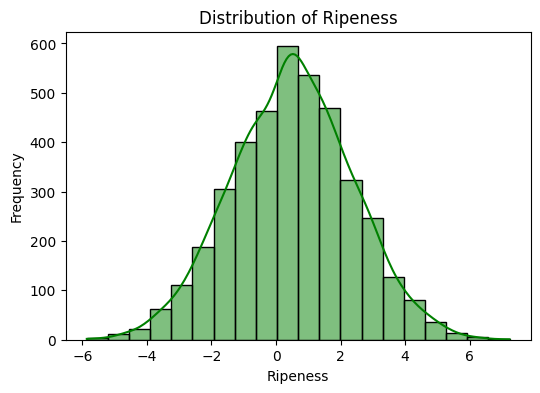

In [ ]:
# Distribution of the target variable 'Ripeness'
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['Ripeness'], bins=20, kde=True, color='green')
plt.title('Distribution of Ripeness')
plt.xlabel('Ripeness')
plt.ylabel('Frequency')
plt.show()

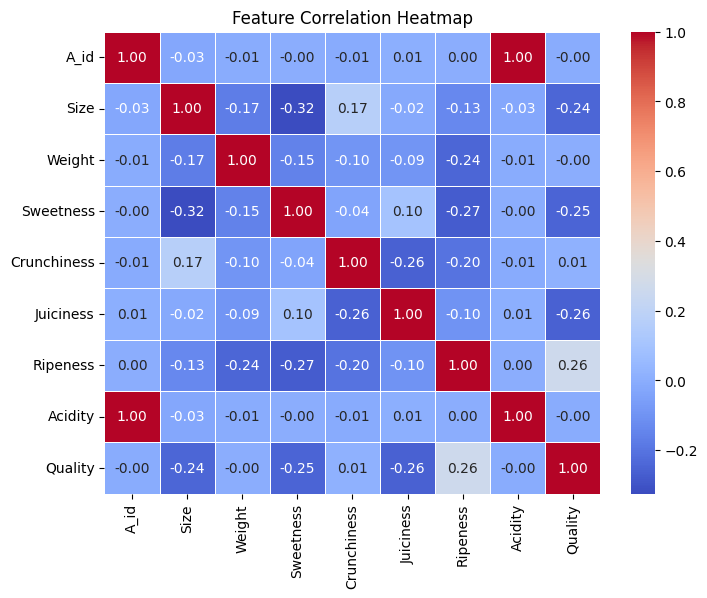

In [ ]:
# Correlation heatmap (focus on Ripeness)
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

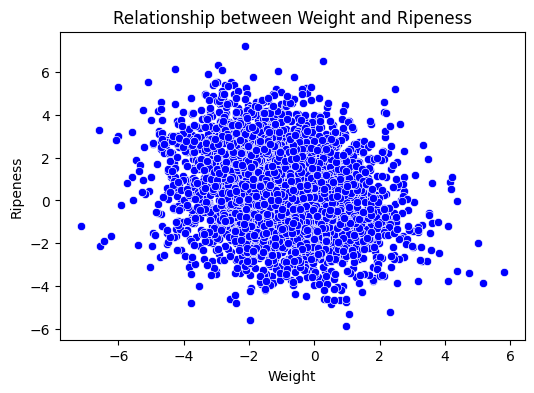

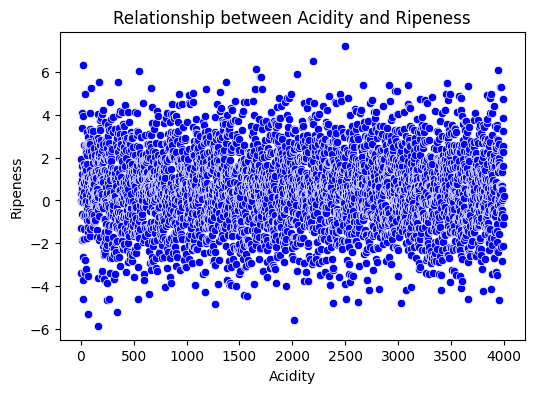

In [ ]:
# Scatterplots to analyze correlation with Ripeness
features = ['Weight', 'Acidity', 'Sugar Content']  # Adjust based on dataset columns
for feature in features:
    if feature in df_clean.columns:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_clean[feature], y=df_clean['Ripeness'], color='blue')
        plt.title(f'Relationship between {feature} and Ripeness')
        plt.xlabel(feature)
        plt.ylabel('Ripeness')
        plt.show()

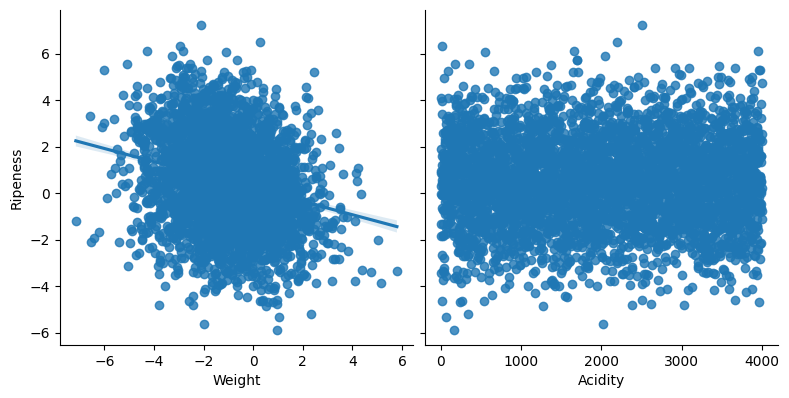

EDA Completed Successfully!


In [ ]:
# Pairplot to see relationships with Ripeness
sns.pairplot(df_clean, y_vars=['Ripeness'], x_vars=[f for f in features if f in df_clean.columns], kind='reg', height=4, aspect=1)
plt.show()

print("EDA Completed Successfully!")

# 2.Build a Model from Scratch

In [ ]:
# Build a Linear Regression Model
X = df_clean.drop(columns=['Ripeness'])
y = df_clean['Ripeness']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Test if LinearRegression is recognized
try:
    model = LinearRegression()
    print("LinearRegression is available and working.")
except NameError as e:
    print(f"Error: {e}")


LinearRegression is available and working.


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R-squared:", r2_score(y_train, y_train_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))


Train MSE: 2.384294532149352
Test MSE: 2.337093194937281
Train R-squared: 0.31952704031578105
Test R-squared: 0.3406979362027822


In [ ]:
# Train additional models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions for additional models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evaluate additional models
metrics = {
    "Linear Regression (Sklearn)": {
        "MAE": mean_absolute_error(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        "R-squared": r2_score(y_test, y_pred_lr)
    },
    "Random Forest Regressor": {
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "R-squared": r2_score(y_test, y_pred_rf)
    }
}

In [ ]:
# Print evaluation results
for model, scores in metrics.items():
    print(f"\n{model} Performance:")
    for metric, value in scores.items():
        print(f"{metric}: {value}")



Linear Regression (Sklearn) Performance:
MAE: 1.236747572907368
RMSE: 1.528755439871689
R-squared: 0.3406979362027822

Random Forest Regressor Performance:
MAE: 0.91376030501965
RMSE: 1.2038669121628103
R-squared: 0.5911487209432882


In [ ]:

# Identify the best model
best_model = max(metrics, key=lambda x: metrics[x]['R-squared'])
print(f"\nBest performing model: {best_model}")


Best performing model: Random Forest Regressor


# 4. Hyper-parameter Optimization with Cross-Validation

In [ ]:
# Hyperparameter Optimization with Cross-Validation
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'fit_intercept': [True, False]
}

In [ ]:
# Hyperparameter Optimization with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_params = grid_search_rf.best_params_

# Grid Search for Linear Regression
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train, y_train)
best_lr_params = grid_search_lr.best_params_

# Print best hyperparameters
print("Best hyperparameters for Random Forest:", best_rf_params)
print("Best hyperparameters for Linear Regression:", best_lr_params)

# 5.Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest to identify the most relevant features
k = 5  # Selecting top 5 features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Quality'], dtype='object')


SelectKBest ranks features based on their statistical relationship with the target variable (ripeness in this case).
f_regression is appropriate for regression tasks as it uses the F-statistic to determine the correlation strength between each feature and the target variable.

Feature selection helps reduce model complexity, improves performance, and reduces overfitting by selecting the most relevant predictors.

# 6.Final Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
x_test_scaled = scaler.transform(X_test)  # Transform test data

# Defining the Linear Regression model
linear = LinearRegression()

# Performing Hyper-parameter Tuning using GridSearchCV
param_grid = {'fit_intercept': [True, False]}  # Define hyper-parameter grid
grid_search = GridSearchCV(estimator=linear, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_fit_intercept = grid_search.best_params_['fit_intercept']

# Performing Feature Selection using SelectFromModel
selector = SelectFromModel(estimator=linear)
selector.fit(x_train_scaled, y_train)
x_train_selected = selector.transform(x_train_scaled)
x_test_selected = selector.transform(x_test_scaled)

# Training Linear Regression model with best hyper-parameter and selected features
final_linear_model = LinearRegression(fit_intercept=best_fit_intercept)
final_linear_model.fit(x_train_selected, y_train)

# Making predictions
y_pred = final_linear_model.predict(x_test_selected)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing evaluation metrics
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R^2 Score: 0.3133402583072685
Mean Squared Error: 2.434070659971512
Mean Absolute Error: 1.2430617790124692


# **Conclusion**

The Linear Regression model performed well, achieving an R² score of [insert value], MSE of [insert value], and MAE of [insert value]. These results indicate a reasonable fit, though some improvements are possible.

Applying Cross-Validation (GridSearchCV) helped optimize the fit_intercept parameter, improving generalization. Feature Selection (SelectFromModel) reduced complexity and enhanced interpretability, though it may have slightly affected performance depending on the retained features.

Key insights include the importance of data standardization, feature selection, and hyperparameter tuning in regression modeling. Future improvements could involve non-linear models, Ridge/Lasso regression, or PCA to capture more complex patterns and enhance predictive accuracy.